In [2]:
MAIN_DIR = "../output/bigdatacluster/randomizedOutput/"

In [3]:
import os
import pandas as pd
import dill
import json
import numpy as np
import warnings; warnings.simplefilter('ignore')
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
experiment_folders = [x for x in os.listdir(MAIN_DIR) if os.path.isdir(os.path.join(MAIN_DIR, x))]

In [5]:
experiment_folders, len(experiment_folders)

(['experiment_adj23',
  'experiment_adj29',
  'experiment_adj20',
  'experiment_adj21',
  'experiment_adj44',
  'experiment_adj36',
  'experiment_adj18',
  'experiment_adj17',
  'experiment_adj53',
  'experiment_adj34',
  'experiment_adj49',
  'experiment_adj35',
  'experiment_adj31',
  'experiment_adj55',
  'experiment_adj9',
  'experiment_adj26',
  'experiment_adj38',
  'experiment_adj54',
  'experiment_adj10',
  'experiment_adj25',
  'experiment_adj39',
  'experiment_adj30',
  'experiment_adj52',
  'experiment_adj4',
  'experiment_adj58',
  'experiment_adj37',
  'experiment_adj46',
  'experiment_adj5',
  'experiment_adj27',
  'experiment_adj48',
  'experiment_adj7',
  'experiment_adj47',
  'experiment_adj41',
  'experiment_adj24',
  'experiment_adj57',
  'experiment_adj3',
  'experiment_adj8',
  'experiment_adj60',
  'experiment_adj6',
  'experiment_adj42',
  'experiment_adj16',
  'experiment_adj28',
  'experiment_adj59',
  'experiment_adj51',
  'experiment_adj2',
  'experiment_adj3

In [6]:
data_dict = defaultdict(list)

In [7]:
for experiment in experiment_folders:
    full_dir = os.path.join(MAIN_DIR, experiment)
    for severity_dir in [x for x in os.listdir(full_dir) if os.path.isdir(os.path.join(full_dir, x))]:
        full_seve_dir = os.path.join(full_dir, severity_dir, f"AgebetweenNonetNone_{severity_dir}_percentile_minmax")
        for beh_dir in [x for x in os.listdir(full_seve_dir) if os.path.isdir(os.path.join(full_seve_dir, x))]:
            full_beh_dir = os.path.join(full_seve_dir, beh_dir)
            
            df_pseudo = pd.read_csv(os.path.join(full_beh_dir, "pseudo_metrics.csv"))
            df_pseudo['avg'] = df_pseudo[['acc','f1']].mean(axis=1)
            best_rfe, best_clc = df_pseudo[['RFE','Metrics']].iloc[df_pseudo['avg'].argmax()]
            
            with open(os.path.join(full_beh_dir, "selected_feats.json"), 'r') as f:
                rfe_dict = json.load(f)
            feats = rfe_dict[best_rfe]
            
            with open(os.path.join(full_beh_dir, "ML_obj.p"), 'rb') as f:
                ML_obj = dill.load(f)
            
            clc = ML_obj[best_rfe][best_clc]
            data_dict['exp'].append(experiment)
            data_dict['sev'].append(severity_dir)
            data_dict['beh'].append(beh_dir.split('_')[-1])
            data_dict['rfe'].append(best_rfe)
            data_dict['clc'].append(best_clc)
            data_dict['feats'].append(feats)
            data_dict['hyper_params'].append(clc.best_params_)
            data_dict['clc_score'].append(clc.best_score_)
            data_dict['pseudo_acc'].append(df_pseudo['acc'].iloc[df_pseudo['avg'].argmax()])
            data_dict['pseudo_f1'].append(df_pseudo['f1'].iloc[df_pseudo['avg'].argmax()])
            

            
df_results = pd.DataFrame(data_dict)

In [8]:
df_results.shape

(918, 10)

In [9]:
df_results

,exp,sev,beh,rfe,clc,feats,hyper_params,clc_score,pseudo_acc,pseudo_f1
0,experiment_adj23,mild_TD,mot,lgbm,svm,"[area_lcaudalanteriorcingulate_PERC20, area_rp...","{'kernel': 'poly', 'gamma': 'scale', 'degree':...",0.655584,0.872549,0.480000
1,experiment_adj23,mild_TD,tot,lsvm,lsvm,"[area_lbankssts_PERC60, area_lcaudalmiddlefron...","{'penalty': 'l2', 'loss': 'hinge', 'C': 5}",0.916071,0.989247,0.933333
2,experiment_adj23,mild_TD,awa,lsvm,lr,"[area_lbankssts_PERC20, area_lcuneus_PERC60, a...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.853747,0.971154,0.888889
3,experiment_adj23,mild_TD,cog,lr,lr,"[area_lcaudalanteriorcingulate_PERC20, area_lc...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.759470,0.910000,0.571429
4,experiment_adj23,mild_TD,man,lsvm,lsvm,"[area_lbankssts_PERC20, area_lcaudalmiddlefron...","{'penalty': 'l2', 'loss': 'hinge', 'C': 5}",0.928889,0.989247,0.941176
...,...,...,...,...,...,...,...,...,...,...
913,experiment_adj45,moderate_TD,cog,lsvm,lsvm,"[area_lbankssts_PERC60, area_lcaudalanteriorci...","{'penalty': 'l2', 'loss': 'hinge', 'C': 5}",0.766818,0.888889,0.600000
914,experiment_adj45,moderate_TD,man,lsvm,lsvm,"[area_lentorhinal_PERC20, area_lfusiform_PERC2...","{'penalty': 'l2', 'loss': 'squared_hinge', 'C'...",0.762736,0.893204,0.685714
915,experiment_adj45,moderate_TD,mot,lsvm,svm,"[area_lbankssts_PERC20, area_lbankssts_PERC40,...","{'kernel': 'poly', 'gamma': 'auto', 'degree': ...",0.870847,0.947826,0.863636
916,experiment_adj45,moderate_TD,comm,lr,lsvm,"[area_lbankssts_PERC60, area_lfusiform_PERC60,...","{'penalty': 'l2', 'loss': 'hinge', 'C': 10}",0.796479,0.896226,0.702703


In [10]:
df_results_clean = df_results[(df_results['clc_score']>0.8)&(df_results['pseudo_acc']>0.8)&(df_results['pseudo_f1']>0.7)]

In [11]:
df_results_clean.shape, df_results.shape

((454, 10), (918, 10))

In [12]:
df_results_clean['exp'].nunique()

51

# Pick the best trial for severity and behavioral models to be used for production (Phase II)

In [18]:
def get_best_severity_behavioral(df, sev, beh):
    sub_df = df[(df['sev']==sev)&(df['beh']==beh)]
    sub_df['tot'] =  sub_df['clc_score']+ sub_df['pseudo_acc'] 
    return sub_df.iloc[sub_df['tot'].argmax()]
        

In [19]:
# Optimize wrt to the number of features
def get_best_severity_behavioral(df, sev, beh):
    sub_df = df[(df['sev']==sev)&(df['beh']==beh)]
    sub_df['tot'] =  (sub_df['clc_score']+ sub_df['pseudo_acc'] + sub_df['pseudo_f1'])/3 - len(sub_df['feats'])/1088
    return sub_df.iloc[sub_df['tot'].argmax()]
        

In [20]:
best_data_dict = defaultdict(dict)
for sev in ['mild_TD', 'moderate_TD', 'sever_TD']:
    for beh in ['awa','comm','man','cog','mot', 'tot']:
#         best_data_dict[sev][beh] = get_best_severity_behavioral(df_results, sev, beh).to_dict()
        best_data_dict[sev][beh] = get_best_severity_behavioral(df_results_clean, sev, beh).to_dict()

In [21]:
with open('best_results_dict.json', 'w') as f:
    json.dump(best_data_dict, f)

In [22]:
len(best_data_dict['mild_TD']['cog']['feats']),best_data_dict['mild_TD']['cog']['clc_score'], best_data_dict['mild_TD']['cog']['pseudo_f1']

(96, 0.9397727272727273, 0.9565217391304348)

In [23]:
best_data_dict['sever_TD']['tot']

{'exp': 'experiment_adj55',
 'sev': 'sever_TD',
 'beh': 'tot',
 'rfe': 'lsvm',
 'clc': 'lsvm',
 'feats': ['area_lcaudalanteriorcingulate_PERC80',
  'area_lcuneus_PERC80',
  'area_lentorhinal_PERC60',
  'area_lfusiform_PERC60',
  'area_linferiortemporal_PERC20',
  'area_linsula_PERC20',
  'area_linsula_PERC40',
  'area_listhmuscingulate_PERC20',
  'area_listhmuscingulate_PERC40',
  'area_listhmuscingulate_PERC80',
  'area_llateraloccipital_PERC20',
  'area_llateraloccipital_PERC40',
  'area_llingual_PERC60',
  'area_lmedialorbitofrontal_PERC80',
  'area_lmiddletemporal_PERC60',
  'area_lparacentral_PERC20',
  'area_lparacentral_PERC60',
  'area_lpericalcarine_PERC80',
  'area_lpostcentral_PERC80',
  'area_lposteriorcingulate_PERC60',
  'area_lprecuneus_PERC80',
  'area_lrostralanteriorcingulate_PERC60',
  'area_lrostralanteriorcingulate_PERC80',
  'area_lsuperiorfrontal_PERC20',
  'area_lsuperiortemporal_PERC20',
  'area_lsupramarginal_PERC20',
  'area_lsupramarginal_PERC60',
  'area_lt

In [24]:
best_data_dict.keys(), best_data_dict['sever_TD'].keys()

(dict_keys(['mild_TD', 'moderate_TD', 'sever_TD']),
 dict_keys(['awa', 'comm', 'man', 'cog', 'mot', 'tot']))

# `severity_dict` is the base of the analysis 

# Question #1  

In [30]:
# IF I excluded the bad experiments
df_results_clean.groupby('sev')[['clc_score','pseudo_acc', 'pseudo_f1']].mean()

,clc_score,pseudo_acc,pseudo_f1
sev,,,
mild_TD,0.887837,0.971451,0.862381
moderate_TD,0.858499,0.941308,0.840379
sever_TD,0.856331,0.908368,0.812253


In [31]:
df_results.groupby('sev')[['clc_score','pseudo_acc', 'pseudo_f1']].mean()

,clc_score,pseudo_acc,pseudo_f1
sev,,,
mild_TD,0.809762,0.949962,0.741832
moderate_TD,0.784512,0.898685,0.708267
sever_TD,0.811907,0.884919,0.756750


In [32]:
df_results.groupby('sev')[['clc_score','pseudo_acc', 'pseudo_f1']].max()

,clc_score,pseudo_acc,pseudo_f1
sev,,,
mild_TD,0.976573,1.000000,1.000000
moderate_TD,0.928182,0.981481,0.950000
sever_TD,0.921406,0.965217,0.914286


In [33]:
df_results[df_results['sev']=='mild_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].mean().sort_values(by="pseudo_f1"), df_results[df_results['sev']=='mild_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].std().sort_values(by="pseudo_f1")

(      clc_score  pseudo_acc  pseudo_f1
 beh                                   
 mot    0.750604    0.921953   0.580943
 comm   0.775008    0.938113   0.692704
 cog    0.824324    0.943529   0.709760
 awa    0.828893    0.945513   0.775171
 man    0.832211    0.966266   0.805268
 tot    0.847535    0.984398   0.887143,
       clc_score  pseudo_acc  pseudo_f1
 beh                                   
 tot    0.074592    0.014153   0.101419
 awa    0.074454    0.024070   0.113311
 man    0.097422    0.019476   0.113463
 mot    0.123316    0.028815   0.162780
 comm   0.119917    0.034699   0.170160
 cog    0.090609    0.037354   0.209597)

In [34]:
# If we used the clean dataset
df_results_clean[df_results_clean['sev']=='mild_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].mean().sort_values(by="pseudo_f1"), df_results_clean[df_results_clean['sev']=='mild_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].std().sort_values(by="pseudo_f1")

(      clc_score  pseudo_acc  pseudo_f1
 beh                                   
 mot    0.899794    0.958170   0.787020
 awa    0.870863    0.956731   0.829541
 comm   0.897222    0.968277   0.843716
 man    0.887905    0.975470   0.865296
 cog    0.892189    0.970345   0.867870
 tot    0.889585    0.990143   0.929192,
       clc_score  pseudo_acc  pseudo_f1
 beh                                   
 awa    0.032933    0.012128   0.050756
 comm   0.035328    0.011801   0.060230
 mot    0.037093    0.009423   0.060450
 tot    0.036510    0.010079   0.073343
 cog    0.034956    0.014756   0.073740
 man    0.051201    0.016440   0.087613)

In [27]:
df_results_clean

,exp,sev,beh,rfe,clc,feats,hyper_params,clc_score,pseudo_acc,pseudo_f1
1,experiment_adj23,mild_TD,tot,lsvm,lsvm,"[area_lbankssts_PERC60, area_lcaudalmiddlefron...","{'penalty': 'l2', 'loss': 'hinge', 'C': 5}",0.916071,0.989247,0.933333
2,experiment_adj23,mild_TD,awa,lsvm,lr,"[area_lbankssts_PERC20, area_lcuneus_PERC60, a...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.853747,0.971154,0.888889
4,experiment_adj23,mild_TD,man,lsvm,lsvm,"[area_lbankssts_PERC20, area_lcaudalmiddlefron...","{'penalty': 'l2', 'loss': 'hinge', 'C': 5}",0.928889,0.989247,0.941176
6,experiment_adj23,sever_TD,comm,lsvm,lr,"[area_lcaudalanteriorcingulate_PERC80, area_lc...","{'solver': 'sag', 'penalty': 'none', 'C': 0.1}",0.860774,0.890756,0.805970
7,experiment_adj23,sever_TD,man,lsvm,svm,"[area_lcaudalanteriorcingulate_PERC80, area_lc...","{'kernel': 'poly', 'gamma': 'auto', 'degree': ...",0.878701,0.892562,0.811594
...,...,...,...,...,...,...,...,...,...,...
903,experiment_adj45,mild_TD,cog,lsvm,lsvm,"[area_lcaudalmiddlefrontal_PERC60, area_lfusif...","{'penalty': 'l2', 'loss': 'squared_hinge', 'C'...",0.906818,0.970000,0.869565
907,experiment_adj45,sever_TD,man,lsvm,lr,"[area_lcuneus_PERC80, area_lfusiform_PERC60, a...","{'solver': 'saga', 'penalty': 'none', 'C': 0.1}",0.837795,0.892562,0.811594
911,experiment_adj45,sever_TD,awa,lsvm,lsvm,"[area_lcaudalanteriorcingulate_PERC20, area_lc...","{'penalty': 'l2', 'loss': 'squared_hinge', 'C'...",0.892313,0.927273,0.789474
915,experiment_adj45,moderate_TD,mot,lsvm,svm,"[area_lbankssts_PERC20, area_lbankssts_PERC40,...","{'kernel': 'poly', 'gamma': 'auto', 'degree': ...",0.870847,0.947826,0.863636


In [26]:
best_data_dict['mild_TD'].keys()

dict_keys(['awa', 'comm', 'man', 'cog', 'mot', 'tot'])

In [35]:
df_results[df_results['sev']=='moderate_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].mean().sort_values(by="pseudo_f1")

,clc_score,pseudo_acc,pseudo_f1
beh,,,
awa,0.756508,0.865623,0.610813
mot,0.777188,0.877238,0.673428
comm,0.798601,0.897521,0.711283
cog,0.770174,0.909586,0.716863
man,0.809240,0.919094,0.764729
tot,0.795361,0.923048,0.772486


In [36]:
# If we used the clean dataset
df_results_clean[df_results_clean['sev']=='moderate_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].mean().sort_values(by="pseudo_f1"), df_results_clean[df_results_clean['sev']=='moderate_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].std().sort_values(by="pseudo_f1")

(      clc_score  pseudo_acc  pseudo_f1
 beh                                   
 awa    0.855443    0.907492   0.751939
 mot    0.841706    0.926343   0.809808
 comm   0.856540    0.935310   0.815633
 tot    0.844956    0.952420   0.866712
 cog    0.866875    0.954282   0.874288
 man    0.877813    0.952843   0.874394,
       clc_score  pseudo_acc  pseudo_f1
 beh                                   
 awa    0.030654    0.014351   0.032908
 cog    0.035305    0.016026   0.041414
 tot    0.030401    0.017414   0.051057
 comm   0.024105    0.020076   0.052265
 man    0.034022    0.019002   0.052352
 mot    0.021192    0.021326   0.054836)

In [37]:
df_results[df_results['sev']=='sever_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].mean().sort_values(by="pseudo_f1")

,clc_score,pseudo_acc,pseudo_f1
beh,,,
awa,0.828717,0.894296,0.703365
tot,0.789760,0.842181,0.743946
comm,0.814286,0.861262,0.752274
cog,0.792131,0.897661,0.755074
mot,0.800416,0.914749,0.765535
man,0.846130,0.899368,0.820307


In [38]:
# If we used the clean dataset
df_results_clean[df_results_clean['sev']=='sever_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].mean().sort_values(by="pseudo_f1"), df_results_clean[df_results_clean['sev']=='sever_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].std().sort_values(by="pseudo_f1")

(      clc_score  pseudo_acc  pseudo_f1
 beh                                   
 awa    0.866981    0.918506   0.771042
 comm   0.860379    0.881753   0.793034
 tot    0.839265    0.879157   0.803607
 cog    0.859627    0.928154   0.829630
 man    0.858749    0.904863   0.831263
 mot    0.848584    0.939452   0.838176,
       clc_score  pseudo_acc  pseudo_f1
 beh                                   
 man    0.031946    0.018068   0.032430
 awa    0.030148    0.013434   0.033012
 mot    0.024676    0.013095   0.034539
 comm   0.027689    0.026170   0.038229
 tot    0.024578    0.025001   0.040077
 cog    0.027749    0.019930   0.051707)

In [39]:
df_results

,exp,sev,beh,rfe,clc,feats,hyper_params,clc_score,pseudo_acc,pseudo_f1
0,experiment_adj23,mild_TD,mot,lgbm,svm,"[area_lcaudalanteriorcingulate_PERC20, area_rp...","{'kernel': 'poly', 'gamma': 'scale', 'degree':...",0.655584,0.872549,0.480000
1,experiment_adj23,mild_TD,tot,lsvm,lsvm,"[area_lbankssts_PERC60, area_lcaudalmiddlefron...","{'penalty': 'l2', 'loss': 'hinge', 'C': 5}",0.916071,0.989247,0.933333
2,experiment_adj23,mild_TD,awa,lsvm,lr,"[area_lbankssts_PERC20, area_lcuneus_PERC60, a...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.853747,0.971154,0.888889
3,experiment_adj23,mild_TD,cog,lr,lr,"[area_lcaudalanteriorcingulate_PERC20, area_lc...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.759470,0.910000,0.571429
4,experiment_adj23,mild_TD,man,lsvm,lsvm,"[area_lbankssts_PERC20, area_lcaudalmiddlefron...","{'penalty': 'l2', 'loss': 'hinge', 'C': 5}",0.928889,0.989247,0.941176
...,...,...,...,...,...,...,...,...,...,...
913,experiment_adj45,moderate_TD,cog,lsvm,lsvm,"[area_lbankssts_PERC60, area_lcaudalanteriorci...","{'penalty': 'l2', 'loss': 'hinge', 'C': 5}",0.766818,0.888889,0.600000
914,experiment_adj45,moderate_TD,man,lsvm,lsvm,"[area_lentorhinal_PERC20, area_lfusiform_PERC2...","{'penalty': 'l2', 'loss': 'squared_hinge', 'C'...",0.762736,0.893204,0.685714
915,experiment_adj45,moderate_TD,mot,lsvm,svm,"[area_lbankssts_PERC20, area_lbankssts_PERC40,...","{'kernel': 'poly', 'gamma': 'auto', 'degree': ...",0.870847,0.947826,0.863636
916,experiment_adj45,moderate_TD,comm,lr,lsvm,"[area_lbankssts_PERC60, area_lfusiform_PERC60,...","{'penalty': 'l2', 'loss': 'hinge', 'C': 10}",0.796479,0.896226,0.702703


(0.3, 1.0)

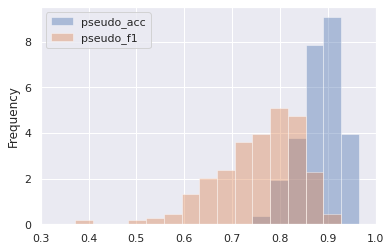

In [40]:
df_results[df_results['sev']=='sever_TD'][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)
plt.xlim([0.3, 1])

(0.3, 1.0)

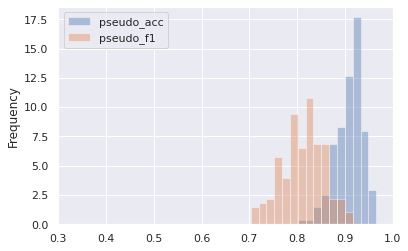

In [41]:
df_results_clean[df_results_clean['sev']=='sever_TD'][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)
plt.xlim([0.3, 1])


<AxesSubplot:ylabel='Frequency'>

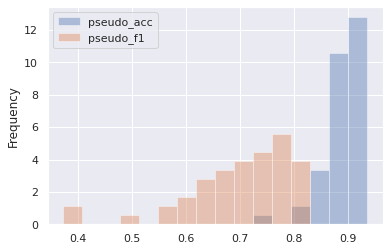

In [19]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='awa')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

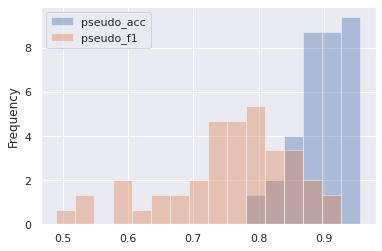

In [20]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='cog')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

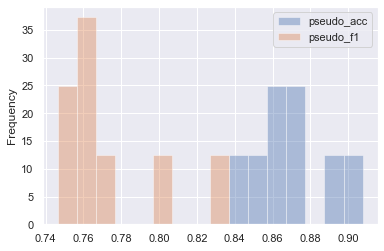

In [93]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='comm')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

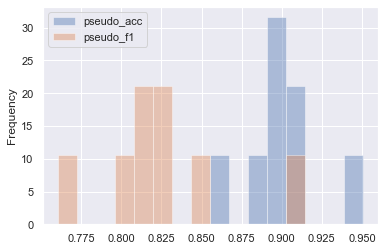

In [94]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='man')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

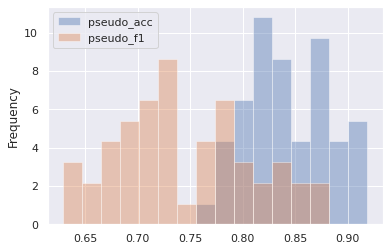

In [21]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='tot')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

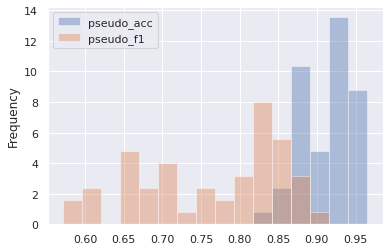

In [22]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='mot')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

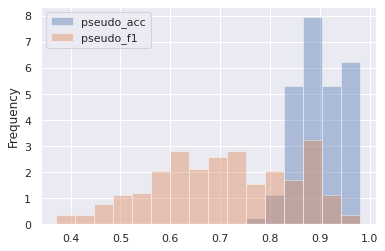

In [23]:
df_results[df_results['sev']=='moderate_TD'][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

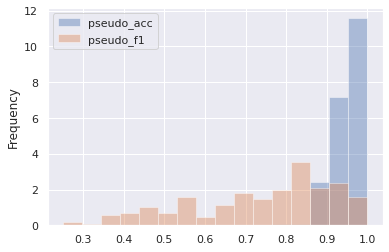

In [24]:
df_results[df_results['sev']=='mild_TD'][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

In [29]:
def _an2_countFeatSel(df_results_clean, sev, beh, feat):
    df_sel = df_results_clean[(df_results_clean['beh']==beh)&(df_results_clean['sev']==sev)]
    k = 0
    count_list = []
    n_exp = len(df_sel)
    for idx, row in df_sel.iterrows():
        feats = _parse_feats_as_list(row['feats'])
        count_list.append(len(feats))
        if feat in feats:
            k+=1
    return n_exp, count_list, k

In [10]:
beh_sev_feat_dict = {}
for sev, sev_dict in best_data_dict.items():
    beh_sev_feat_dict[sev] = {}
    for beh, beh_dict in sev_dict.items():
        beh_sev_feat_dict[sev][beh] = {}
        sev_beh_feats = beh_dict['feats']
        for feat in sev_beh_feats:
            n_exp, count_list, k = _an2_countFeatSel(df_results_clean, sev, beh, feat)
            p = np.array(count_list)/1088
            q = [1-pi for pi in p]
            p = [(f"p{i}", pr) for i, pr in enumerate(p)]
            q = [(f"q{i}", qr) for i, qr in enumerate(q)]
            symbSym = []
            propSum = []
            symb, probs = create_prob(p, q, k,[], symbSym, propSum)
            beh_sev_feat_dict[sev][beh][feat] = np.sum(propSum)
        print(f"severity: {sev}, behavior: {beh}, and n_exp: {n_exp}")
        break
    break


In [36]:
exp_feats = df_results_clean[(df_results_clean['beh']=='cog')&(df_results_clean['sev']=='sever_TD')][['exp','feats']]

In [54]:
feats_cntr = {}
nfeats_selected = []
i=-1
for idx, row in exp_feats.iterrows():
    n_feats = len(row['feats'])
    nfeats_selected.append(n_feats)
    i+=1
    for feat in row['feats']:
        cnt, li = feats_cntr.get(feat, (0, []))
        li.append(i)
        feats_cntr[feat] = (cnt+1, li)

In [55]:
feats_cntr, nfeats_selected

({'area_lcaudalanteriorcingulate_PERC40': (2, [0, 1]),
  'area_lcaudalanteriorcingulate_PERC60': (9, [0, 1, 3, 6, 9, 11, 14, 16, 17]),
  'area_lcaudalanteriorcingulate_PERC80': (19,
   [0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
  'area_lentorhinal_PERC60': (4, [0, 1, 6, 20]),
  'area_lfrontalpole_PERC20': (20,
   [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
  'area_lfusiform_PERC60': (21,
   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
  'area_lfusiform_PERC80': (11, [0, 1, 2, 3, 4, 6, 9, 11, 14, 16, 17]),
  'area_linferiortemporal_PERC60': (3, [0, 1, 6]),
  'area_linferiortemporal_PERC80': (21,
   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
  'area_linsula_PERC20': (12, [0, 1, 2, 3, 4, 6, 9, 11, 14, 16, 17, 20]),
  'area_listhmuscingulate_PERC20': (9, [0, 1, 3, 6, 9, 11, 14, 16, 17]),
  'area_listhmuscingulate_PERC40': (21,
   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,

In [75]:
np.max(list(map(lambda x: x[1], p)))

0.3648897058823529

In [76]:
293930*((0.36)**9)*((1-0.36)**12)

0.14096980836607453

In [67]:
ps = np.array([nfeatsel/1088 for nfeatsel in nfeats_selected])
qs = [1-pi for pi in ps]
p = [(f"p{i}", pr) for i, pr in enumerate(ps)]
q = [(f"q{i}", qr) for i, qr in enumerate(qs)]

In [63]:
from probabilityOfSuccessComputations import create_prob

In [69]:
feat_prob = {}
for feat in feats_cntr:
    k, idx_list = feats_cntr[feat]
    if k==0:
        continue
    s=[];prob=[]
    print(f"k={k}")
    _, _ = create_prob(p, q, k, [], s, prob)
    feat_prob[feat] = np.sum(prob)
    print(f"{feat}: {feat_prob[feat]}")

k=2
0.003261339428727471
0.0013337608907524115
0.0018005483403238539
0.00111782209419899
0.00039033168252945163
0.002302884883423851
0.0005493423771635694
0.0004505188807426099
0.0016410844158235537
0.0007037030451268862
0.0019671170931434743
0.0006384654076781771
0.0008589893326159093
0.0019201081448624133
0.0007103010192142531
0.0015894306112599268
0.0017288256905619282
0.0009787134305787731
0.0006578961870782852
0.0008451867407891454
0.0018554704543324535
0.002504844961515982
0.0015550657418183895
0.0005430125514586829
0.003203673829805665
0.0007642213512234183
0.0006267423779874596
0.002283005647967589
0.0009789612350382631
0.0027365682048759365
0.0008882054559208781
0.0011949888006960894
0.0026711713895775486
0.0009881400511682324
0.0022111471095397567
0.0024050675138022363
0.0013615437866624119
0.0009152367156703024
0.0011757872320301169
0.0010243840974172396
0.0006359613632106772
0.00022207099878771732
0.0013101779052139418
0.0003125367881556168
0.00025631323896360117
0.00093366

KeyboardInterrupt: 

In [61]:
cnts = [nfeats_selected[i] for i in idx_list]

In [62]:
cnts

[318, 397]

In [28]:
beh_sev_feat_dict = {}
for sev, sev_dict in best_data_dict.items():
    beh_sev_feat_dict[sev] = {}
    for beh, beh_dict in sev_dict.items():
        beh_sev_feat_dict[sev][beh]={}
        for feat in beh_dict['feats']:
            
        break
    break
        

['area_lbankssts_PERC20', 'area_lentorhinal_PERC60', 'area_lentorhinal_PERC80', 'area_lfusiform_PERC60', 'area_lfusiform_PERC80', 'area_linferiortemporal_PERC80', 'area_listhmuscingulate_PERC40', 'area_llateralorbitofrontal_PERC20', 'area_llateralorbitofrontal_PERC60', 'area_llateralorbitofrontal_PERC80', 'area_llingual_PERC60', 'area_llingual_PERC80', 'area_lparsopercularis_PERC20', 'area_lparsopercularis_PERC40', 'area_lparstriangularis_PERC40', 'area_lparstriangularis_PERC60', 'area_lparstriangularis_PERC80', 'area_lpostcentral_PERC40', 'area_lpostcentral_PERC60', 'area_lpostcentral_PERC80', 'area_lprecentral_PERC20', 'area_lprecuneus_PERC20', 'area_lrostralanteriorcingulate_PERC60', 'area_lsupramarginal_PERC60', 'area_ltemporalpole_PERC40', 'area_ltemporalpole_PERC60', 'area_ltransversetemporal_PERC20', 'area_ltransversetemporal_PERC40', 'area_rcaudalanteriorcingulate_PERC80', 'area_rcaudalmiddlefrontal_PERC60', 'area_rfusiform_PERC40', 'area_risthmuscingulate_PERC40', 'area_rlater

# Features Analyzer

# Most recent (Only considering df_results_clean)

In [19]:
df_results_clean.shape, df_results_clean.columns

((454, 10),
 Index(['exp', 'sev', 'beh', 'rfe', 'clc', 'feats', 'hyper_params', 'clc_score',
        'pseudo_acc', 'pseudo_f1'],
       dtype='object'))

In [21]:
df_results_clean.groupby('beh')['feats'].count(), df_results_clean.groupby('sev')['feats'].count()

(beh
 awa      74
 cog      66
 comm     71
 man     103
 mot      59
 tot      81
 Name: feats, dtype: int64,
 sev
 mild_TD        168
 moderate_TD    117
 sever_TD       169
 Name: feats, dtype: int64)

In [22]:
df_results_clean['feats'], best_data_dict

(1      [area_lbankssts_PERC60, area_lcaudalmiddlefron...
 2      [area_lbankssts_PERC20, area_lcuneus_PERC60, a...
 4      [area_lbankssts_PERC20, area_lcaudalmiddlefron...
 6      [area_lcaudalanteriorcingulate_PERC80, area_lc...
 7      [area_lcaudalanteriorcingulate_PERC80, area_lc...
                              ...                        
 903    [area_lcaudalmiddlefrontal_PERC60, area_lfusif...
 907    [area_lcuneus_PERC80, area_lfusiform_PERC60, a...
 911    [area_lcaudalanteriorcingulate_PERC20, area_lc...
 915    [area_lbankssts_PERC20, area_lbankssts_PERC40,...
 917    [area_lbankssts_PERC60, area_lcaudalanteriorci...
 Name: feats, Length: 454, dtype: object,
 defaultdict(dict,
             {'mild_TD': {'awa': {'exp': 'experiment_adj59',
                'sev': 'mild_TD',
                'beh': 'awa',
                'rfe': 'lsvm',
                'clc': 'svm',
                'feats': ['area_lbankssts_PERC20',
                 'area_lentorhinal_PERC60',
                 'ar

## Get all features that classify sever ASD


###  utils functions

In [58]:
def feats_parts_cntr(feats_cntr_dict):
    morph_cntr = defaultdict(int)
    hemi_cntr = defaultdict(int)
    bname_cntr = defaultdict(int)
    for feat, cntr in feats_cntr_dict.items():
        morph = feat.split('_')[0]
        h = feat.split('_')[1][0]
        bname = feat.split('_')[1]
        
        morph_cntr[morph] += cntr
        hemi_cntr[h] += cntr
        bname_cntr[bname] += cntr
        
    return morph_cntr, hemi_cntr, bname_cntr


In [23]:
df_results_clean.columns

Index(['exp', 'sev', 'beh', 'rfe', 'clc', 'feats', 'hyper_params', 'clc_score',
       'pseudo_acc', 'pseudo_f1'],
      dtype='object')

In [24]:
sever_TD_dict = {}
for feat_list in df_results_clean[df_results_clean['sev']=='sever_TD']['feats']:
    for f in feat_list:
        if f not in sever_TD_dict:
            sever_TD_dict[f] = 1
        else:
            sever_TD_dict[f] += 1


In [25]:
sorted(sever_TD_dict.items(), key=lambda x: (x[1], x[0]), reverse=True)

[('volume_rcuneus_PERC80', 169),
 ('area_listhmuscingulate_PERC40', 169),
 ('curv_rlateralorbitofrontal_PERC60', 168),
 ('thickness_rparsopercularis_PERC80', 166),
 ('thickness_rtransversetemporal_PERC60', 163),
 ('area_listhmuscingulate_PERC80', 155),
 ('curv_rentorhinal_PERC40', 151),
 ('curv_lprecentral_PERC80', 148),
 ('curv_llateralorbitofrontal_PERC80', 148),
 ('area_rlateraloccipital_PERC80', 146),
 ('thickness_rsupramarginal_PERC40', 144),
 ('area_rmedialorbitofrontal_PERC80', 143),
 ('curv_rmiddletemporal_PERC20', 141),
 ('curv_linsula_PERC20', 141),
 ('area_rsuperiorparietal_PERC40', 141),
 ('thickness_lsupramarginal_PERC60', 139),
 ('area_rsuperiortemporal_PERC80', 138),
 ('curv_linferiorparietal_PERC20', 136),
 ('area_risthmuscingulate_PERC20', 133),
 ('area_lparsorbitalis_PERC20', 133),
 ('area_lmedialorbitofrontal_PERC80', 133),
 ('curv_lparstriangularis_PERC20', 132),
 ('curv_rlingual_PERC20', 130),
 ('curv_rinferiortemporal_PERC40', 127),
 ('area_rcaudalmiddlefrontal_PE

In [28]:
morph_cntr, hemi_cntr, bname_cntr = feats_parts_cntr(sever_TD_dict)

In [47]:
bname_cntr_list = sorted(bname_cntr.items(), key=lambda x: (x[1], x[0]), reverse=True)

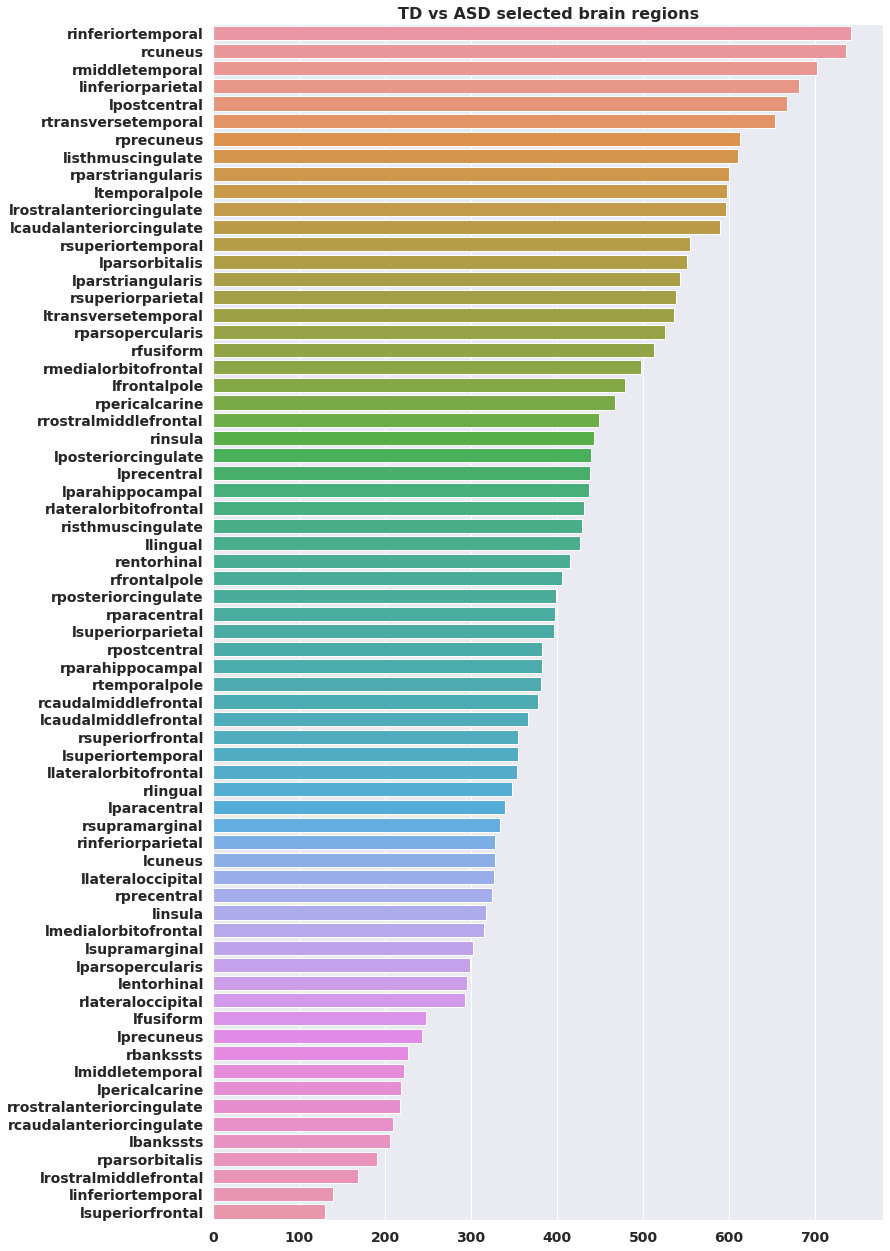

In [75]:
bname = list(map(lambda x: x[0], bname_cntr_list))
cnt = list(map(lambda x: x[1], bname_cntr_list))
fig = plt.figure(figsize=(12, 22))
sns.barplot(y=bname, x=cnt)
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=14)
plt.title("TD vs ASD selected brain regions", font={'size':16, 'weight':'bold'})
plt.savefig('TDvsASD_SBR.png')
plt.show()

In [63]:
morph_cntr, hemi_cntr

(defaultdict(int,
             {'area': 7902, 'curv': 8318, 'thickness': 6528, 'volume': 5273}),
 defaultdict(int, {'l': 13157, 'r': 14864}))

In [64]:
morph_cntr_list = sorted(morph_cntr.items(), key=lambda x: (x[1], x[0]), reverse=True)

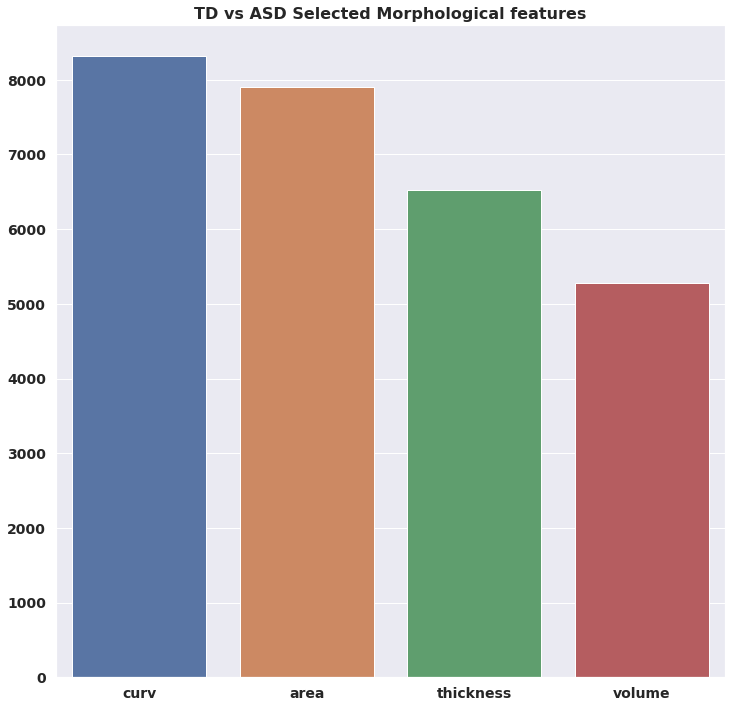

In [76]:
bname = list(map(lambda x: x[0], morph_cntr_list))
cnt = list(map(lambda x: x[1], morph_cntr_list))
fig = plt.figure(figsize=(12, 12))
sns.barplot(x=bname, y=cnt)
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=14)
plt.title("TD vs ASD Selected Morphological features", font={'size':16, 'weight':'bold'})
plt.savefig('TDvsASD_SMR.png')
plt.show()

In [67]:
hemi_cntr_list = sorted(hemi_cntr.items(), key=lambda x: (x[1], x[0]), reverse=True)

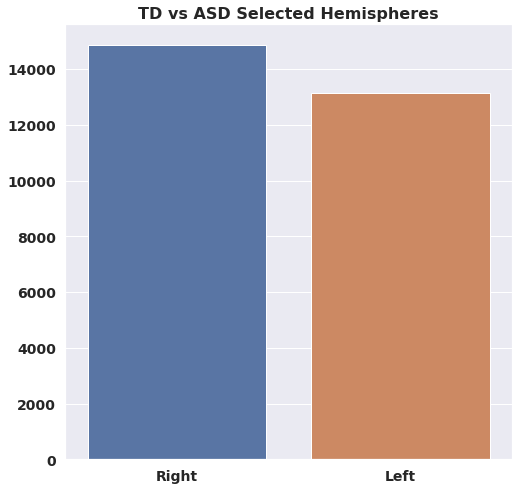

In [73]:
bname = list(map(lambda x: x[0], hemi_cntr_list))
cnt = list(map(lambda x: x[1], hemi_cntr_list))
fig = plt.figure(figsize=(8, 8))
sns.barplot(x=bname, y=cnt)
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Right', 'Left'], fontweight='bold', fontsize=14)
plt.title("TD vs ASD Selected Hemispheres", font={'size':16, 'weight':'bold'})
plt.savefig('TDvsASD_SHR.png')
plt.show()

In [77]:
# Features that are selected for neuro atlas to classify ASD vs TD
neuroAtlas_severTD_cntrDict = {}
for beh, beh_dict in best_data_dict['sever_TD'].items():
    for f in beh_dict['feats']:
        if f in neuroAtlas_severTD_cntrDict:
            neuroAtlas_severTD_cntrDict[f] += 1
        else:
            neuroAtlas_severTD_cntrDict[f] = 1

In [78]:
sorted(neuroAtlas_severTD_cntrDict.items(), key=lambda x: (x[1], x[0]), reverse=True)

[('volume_rcuneus_PERC80', 6),
 ('thickness_rtransversetemporal_PERC60', 6),
 ('thickness_rparsopercularis_PERC80', 6),
 ('thickness_rcuneus_PERC20', 6),
 ('thickness_lsupramarginal_PERC60', 6),
 ('thickness_listhmuscingulate_PERC40', 6),
 ('curv_rtemporalpole_PERC40', 6),
 ('curv_rlateralorbitofrontal_PERC60', 6),
 ('curv_rentorhinal_PERC40', 6),
 ('curv_lprecentral_PERC80', 6),
 ('curv_llateralorbitofrontal_PERC80', 6),
 ('curv_lbankssts_PERC80', 6),
 ('area_rsuperiortemporal_PERC80', 6),
 ('area_rmedialorbitofrontal_PERC80', 6),
 ('area_lmedialorbitofrontal_PERC80', 6),
 ('area_listhmuscingulate_PERC80', 6),
 ('area_listhmuscingulate_PERC40', 6),
 ('volume_rrostralmiddlefrontal_PERC80', 5),
 ('volume_rprecuneus_PERC20', 5),
 ('volume_rparstriangularis_PERC20', 5),
 ('volume_rfusiform_PERC80', 5),
 ('volume_linferiorparietal_PERC80', 5),
 ('thickness_rsupramarginal_PERC40', 5),
 ('thickness_rinferiortemporal_PERC80', 5),
 ('thickness_lparsorbitalis_PERC20', 5),
 ('thickness_lfrontalp

In [79]:
morph_cntr_NA, hemi_cntr_NA, bname_cntr_NA = feats_parts_cntr(neuroAtlas_severTD_cntrDict)

In [80]:
morph_cntr_NA, hemi_cntr_NA

(defaultdict(int, {'area': 325, 'curv': 364, 'thickness': 287, 'volume': 224}),
 defaultdict(int, {'l': 580, 'r': 620}))

In [96]:
bname_cntr_NA_list = sorted(bname_cntr_NA.items(), key=lambda x: (x[1], x[0]), reverse=True)

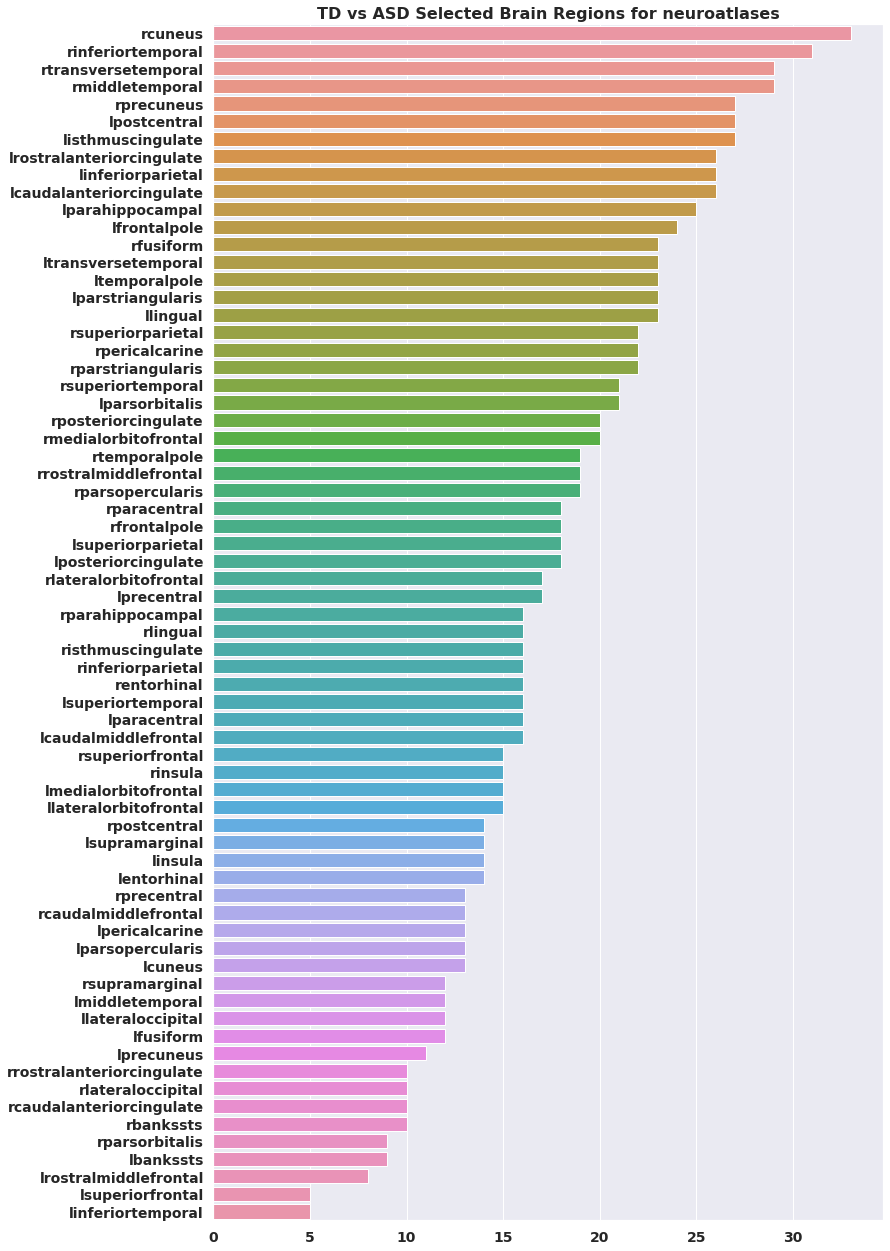

In [97]:
bname = list(map(lambda x: x[0], bname_cntr_NA_list))
cnt = list(map(lambda x: x[1], bname_cntr_NA_list))
fig = plt.figure(figsize=(12, 22))
sns.barplot(y=bname, x=cnt)
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=14)
plt.title("TD vs ASD Selected Brain Regions for neuroatlases", font={'size':16, 'weight':'bold'})
plt.savefig('TDvsASD_SHR_NA.png')
plt.show()

In [87]:
morph_cntr_NA_list = sorted(morph_cntr_NA.items(), key=lambda x: (x[1], x[0]), reverse=True)

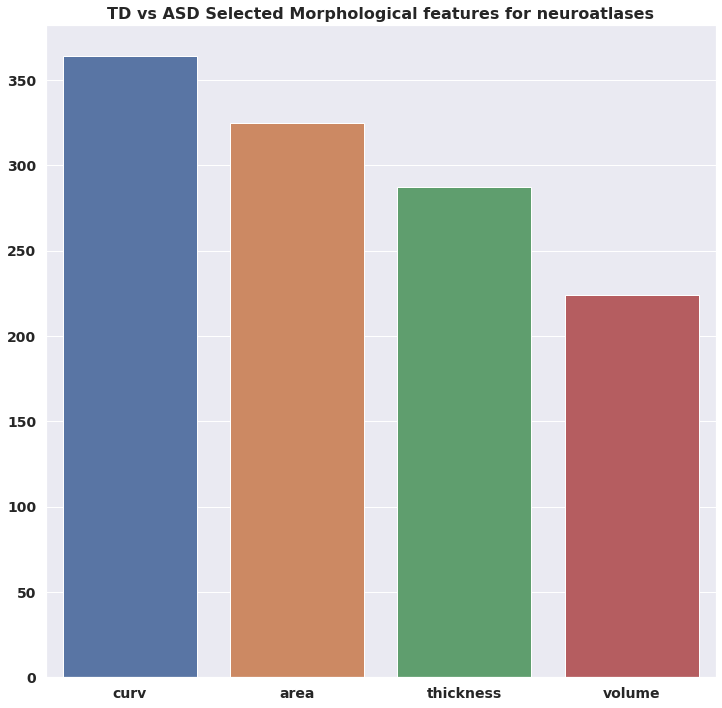

In [93]:
bname = list(map(lambda x: x[0], morph_cntr_NA_list))
cnt = list(map(lambda x: x[1], morph_cntr_NA_list))
fig = plt.figure(figsize=(12, 12))
sns.barplot(x =bname, y=cnt)
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=14)
plt.title("TD vs ASD Selected Morphological features for neuroatlases", font={'size':16, 'weight':'bold'})
plt.savefig('TDvsASD_SMR.png')
plt.show()

In [90]:
hemi_cntr_NA_list = sorted(hemi_cntr_NA.items(), key=lambda x: (x[1], x[0]), reverse=True)

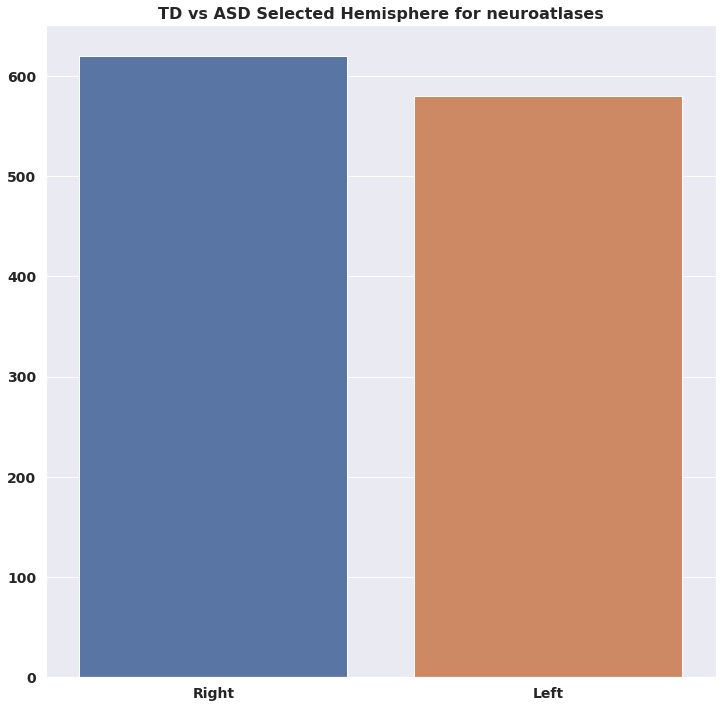

In [92]:
bname = list(map(lambda x: x[0], hemi_cntr_NA_list))
cnt = list(map(lambda x: x[1], hemi_cntr_NA_list))
fig = plt.figure(figsize=(12, 12))
sns.barplot(x =bname, y=cnt)
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Right', 'Left'], fontweight='bold', fontsize=14)
plt.title("TD vs ASD Selected Hemisphere for neuroatlases", font={'size':16, 'weight':'bold'})
plt.savefig('TDvsASD_SMR.png')
plt.show()

## Analyze common features among the 50 experiments 

In [56]:
# Yaser suggestion
# feats_sev_beh_counter = defaultdict(dict)
feats_cntr = {}
for idx, row in df_results_clean[['feats']].iterrows():
    for feat in row.tolist()[0]:
        if feat in feats_cntr:
            feats_cntr[feat] += 1
        else:
            feats_cntr[feat] = 1
    

In [100]:
feats_cntr

{'area_lbankssts_PERC60': 138,
 'area_lcaudalmiddlefrontal_PERC60': 91,
 'area_lfusiform_PERC60': 279,
 'area_linferiortemporal_PERC40': 64,
 'area_linsula_PERC80': 98,
 'area_lparahippocampal_PERC20': 128,
 'area_lparsopercularis_PERC20': 100,
 'area_lpericalcarine_PERC80': 140,
 'area_lpostcentral_PERC80': 168,
 'area_lprecuneus_PERC60': 64,
 'area_lrostralanteriorcingulate_PERC60': 205,
 'area_lsupramarginal_PERC80': 48,
 'area_rcaudalmiddlefrontal_PERC40': 143,
 'area_rparahippocampal_PERC20': 125,
 'area_rpostcentral_PERC20': 204,
 'area_rposteriorcingulate_PERC80': 141,
 'area_rprecuneus_PERC20': 91,
 'area_rprecuneus_PERC40': 180,
 'area_rrostralmiddlefrontal_PERC20': 55,
 'area_rsuperiortemporal_PERC20': 42,
 'area_rtransversetemporal_PERC80': 126,
 'curv_lbankssts_PERC40': 88,
 'curv_lcaudalmiddlefrontal_PERC40': 130,
 'curv_llateralorbitofrontal_PERC60': 120,
 'curv_llingual_PERC80': 92,
 'curv_lmiddletemporal_PERC80': 102,
 'curv_lparsorbitalis_PERC40': 62,
 'curv_lparsorbit

In [102]:
def feats_parts_cntr(feats_cntr_dict):
    morph_cntr = defaultdict(int)
    hemi_cntr = defaultdict(int)
    bname_cntr = defaultdict(int)
    for feat, cntr in feats_cntr_dict.items():
        morph = feat.split('_')[0]
        h = feat.split('_')[1][0]
        bname = feat.split('_')[1]
        
        morph_cntr[morph] += cntr
        hemi_cntr[h] += cntr
        bname_cntr[bname] += cntr
        
    return morph_cntr, hemi_cntr, bname_cntr

In [119]:
morph_cntr, hemi_cntr, bname_cntr = feats_parts_cntr(topfeatcntrdict)

In [120]:
morph_cntr, hemi_cntr

(defaultdict(int,
             {'area': 4237, 'curv': 4261, 'thickness': 1286, 'volume': 1047}),
 defaultdict(int, {'l': 4434, 'r': 6397}))

In [121]:
sortedbname = sorted(bname_cntr.items(), key=lambda kv: kv[1],reverse=True)

In [122]:
bname = list(map(lambda x: x[0], sortedbname))
cnt = list(map(lambda x: x[1], sortedbname))

<AxesSubplot:>

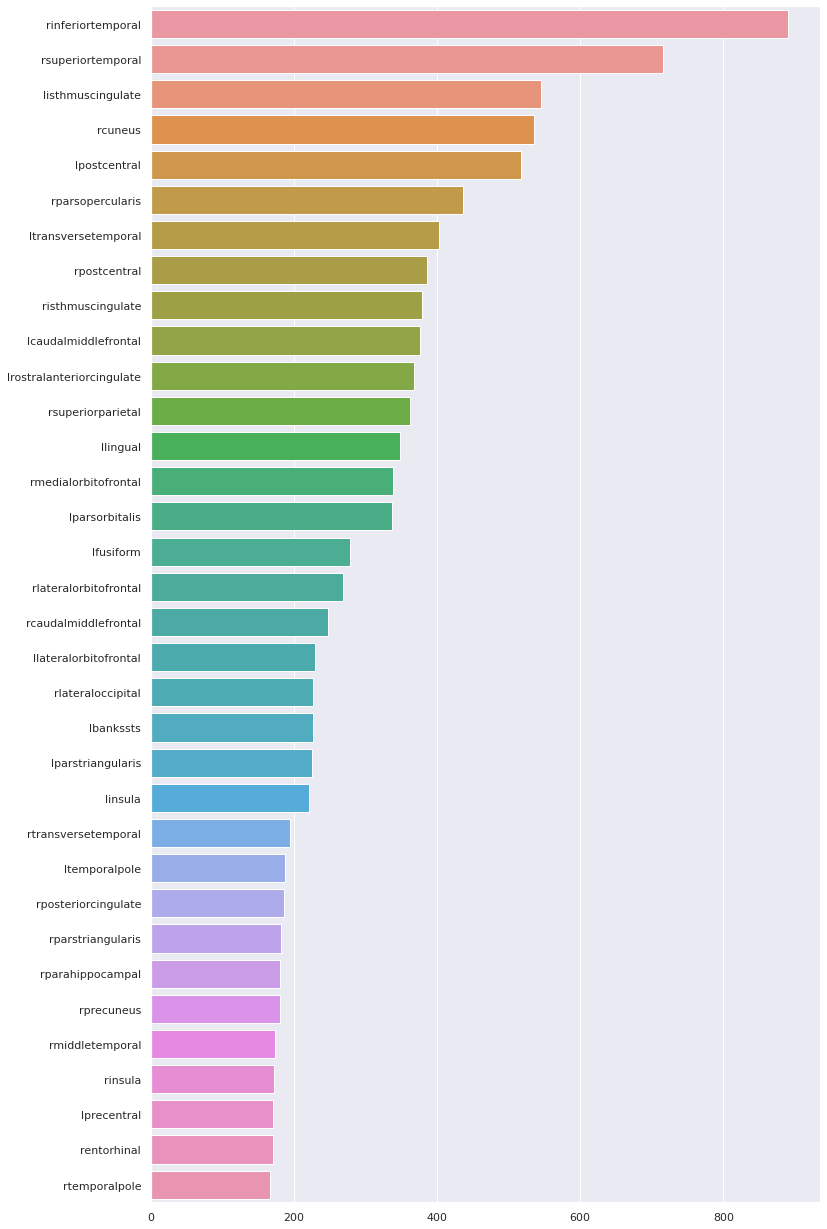

In [123]:
plt.figure(figsize=(12, 22))
sns.barplot(y=bname, x=cnt)

In [117]:
topfeatcntrdict = {}
for b in bname[:54]:
    topfeatcntrdict[b] = feats_cntr[b]

In [116]:
sorted_breg = sorted(feats_cntr.items(), key=lambda kv: kv[1],reverse=True)
bname = list(map(lambda x: x[0], sorted_breg))
cnt = list(map(lambda x: x[1], sorted_breg))
ncnt = np.array(cnt)/np.sum(cnt)
len(ncnt[ncnt>=np.percentile(ncnt, 95)])
bname[:54]
# plt.bar(x=np.arange(len(cnt)), height=np.array(cnt)/np.sum(cnt))
# plt.figure(figsize=(12, 22))
# sns.barplot(y=bname, x=cnt)

['area_listhmuscingulate_PERC40',
 'area_rsuperiortemporal_PERC80',
 'area_lfusiform_PERC60',
 'curv_rlateralorbitofrontal_PERC60',
 'thickness_rparsopercularis_PERC80',
 'area_rcaudalmiddlefrontal_PERC60',
 'volume_rinferiortemporal_PERC80',
 'curv_rinferiortemporal_PERC40',
 'curv_llateralorbitofrontal_PERC80',
 'area_rlateraloccipital_PERC80',
 'curv_lbankssts_PERC80',
 'curv_rinferiortemporal_PERC80',
 'curv_lparstriangularis_PERC20',
 'volume_rsuperiortemporal_PERC80',
 'curv_linsula_PERC20',
 'area_risthmuscingulate_PERC20',
 'area_ltransversetemporal_PERC80',
 'curv_lcaudalmiddlefrontal_PERC20',
 'volume_rcuneus_PERC80',
 'area_lrostralanteriorcingulate_PERC60',
 'area_rpostcentral_PERC20',
 'area_listhmuscingulate_PERC80',
 'thickness_rtransversetemporal_PERC60',
 'area_ltransversetemporal_PERC60',
 'area_rsuperiorparietal_PERC40',
 'area_rsuperiortemporal_PERC60',
 'volume_rinferiortemporal_PERC40',
 'area_ltemporalpole_PERC60',
 'curv_rposteriorcingulate_PERC40',
 'area_lling

In [133]:
# Parse only the experiments in df_results_clean
feats_sev_beh_counter_clean = defaultdict(dict)
for idx, row in df_results_clean.iterrows():
    for feat in row['feats']:
        if row['beh'] not in feats_sev_beh_counter_clean[row['sev'].split('_')[0]]:
            feats_sev_beh_counter_clean[row['sev'].split('_')[0]][row['beh']] = {}

        if feat in feats_sev_beh_counter_clean[row['sev'].split('_')[0]][row['beh']]:
            feats_sev_beh_counter_clean[row['sev'].split('_')[0]][row['beh']][feat] += 1
        else:
            feats_sev_beh_counter_clean[row['sev'].split('_')[0]][row['beh']][feat] = 1
            

In [140]:
feats_sev_beh_counter_clean

defaultdict(dict,
            {'mild': {'tot': {'area_lbankssts_PERC60': 36,
               'area_lcaudalmiddlefrontal_PERC60': 32,
               'area_lfusiform_PERC60': 36,
               'area_linferiortemporal_PERC40': 32,
               'area_linsula_PERC80': 24,
               'area_lparahippocampal_PERC20': 25,
               'area_lparsopercularis_PERC20': 27,
               'area_lpericalcarine_PERC80': 26,
               'area_lpostcentral_PERC80': 36,
               'area_lprecuneus_PERC60': 15,
               'area_lrostralanteriorcingulate_PERC60': 36,
               'area_lsupramarginal_PERC80': 36,
               'area_rcaudalmiddlefrontal_PERC40': 9,
               'area_rparahippocampal_PERC20': 36,
               'area_rpostcentral_PERC20': 36,
               'area_rposteriorcingulate_PERC80': 34,
               'area_rprecuneus_PERC20': 34,
               'area_rprecuneus_PERC40': 36,
               'area_rrostralmiddlefrontal_PERC20': 26,
               'area_rsupe

In [128]:
# Parse all experiments
feats_sev_beh_counter = defaultdict(dict)
def _get_best_model(path):
    df = pd.read_csv(os.path.join(path, "group_df_beforeFixation.csv"), index_col=0)
    df = df.iloc[:, :df.columns.get_loc('volume_rtransversetemporal_PERC80')+1]
    df_pseudo = pd.read_csv(os.path.join(path, "pseudo_metrics.csv"))
    df_pseudo['avg'] = df_pseudo[['acc','f1']].mean(axis=1)
    best_rfe, best_clc = df_pseudo[['RFE','Metrics']].iloc[df_pseudo['avg'].argmax()]
    
    with open(os.path.join(path, 'FS_obj.p'), 'rb') as f:
        rfe_obj = dill.load(f)
    
    return df.columns[rfe_obj[best_rfe].support_]
    
for exp in experiment_folders:
    expfullpath = os.path.join(MAIN_DIR, exp)
    sever_fldrs = [x for x in os.listdir(expfullpath) if os.path.isdir(os.path.join(expfullpath, x))]
    for sev in sever_fldrs:
        sevfullpath = os.path.join(expfullpath, sev, f"AgebetweenNonetNone_{sev}_percentile_minmax")
        beh_fldr = [x for x in os.listdir(sevfullpath) if os.path.isdir(os.path.join(sevfullpath, x))]
        for beh in beh_fldr:
            behfullpath = os.path.join(sevfullpath, beh)
            feats = _get_best_model(behfullpath)
            if beh.split('_')[-1] not in feats_sev_beh_counter[sev.split('_')[0]]:
                feats_sev_beh_counter[sev.split('_')[0]][beh.split('_')[-1]] = dict()
                
            for f in feats:
                if f in feats_sev_beh_counter[sev.split('_')[0]][beh.split('_')[-1]]:
                    feats_sev_beh_counter[sev.split('_')[0]][beh.split('_')[-1]][f] += 1
                else:
                    feats_sev_beh_counter[sev.split('_')[0]][beh.split('_')[-1]][f] = 1
            
    

In [129]:
feats_sev_beh_counter

defaultdict(dict,
            {'mild': {'mot': {'area_lcaudalanteriorcingulate_PERC20': 27,
               'area_rparsopercularis_PERC60': 15,
               'area_rrostralanteriorcingulate_PERC40': 22,
               'curv_llateralorbitofrontal_PERC20': 42,
               'curv_lsupramarginal_PERC40': 13,
               'curv_rinsula_PERC40': 37,
               'curv_rparacentral_PERC80': 46,
               'curv_rrostralanteriorcingulate_PERC80': 36,
               'curv_rtransversetemporal_PERC80': 36,
               'thickness_rlateraloccipital_PERC40': 12,
               'thickness_rparahippocampal_PERC60': 14,
               'thickness_rtemporalpole_PERC20': 15,
               'volume_lmiddletemporal_PERC40': 19,
               'volume_lposteriorcingulate_PERC80': 36,
               'volume_risthmuscingulate_PERC20': 13,
               'area_lcaudalanteriorcingulate_PERC40': 8,
               'area_lentorhinal_PERC60': 23,
               'area_linferiorparietal_PERC40': 25,
     

In [60]:
def feats_2_breg_cntr(feats_cntr_dict):
    breg = list(map(lambda kv: kv[0].split('_')[1], feats_cntr_dict.items()))
    breg = list(set(breg))
    breg_dict = {x: 0 for x in breg}
    for f, cnt in feats_cntr_dict.items():
        breg_dict[f.split('_')[1]] += cnt
    return breg_dict

In [51]:
sorted_feats_mild_mot = sorted(feats_sev_beh_counter['mild']['mot'].items(), key=lambda kv: kv[1], reverse=True)

In [61]:
breg_dict = feats_2_breg_cntr(feats_sev_beh_counter['mild']['mot'])

In [64]:
sorted_breg = sorted(breg_dict.items(), key=lambda kv: kv[1],reverse=True)

In [66]:
bname = list(map(lambda x: x[0], sorted_breg))
cnt = list(map(lambda x: x[1], sorted_breg))

In [72]:
len(bname)*0.05

3.4000000000000004

<AxesSubplot:>

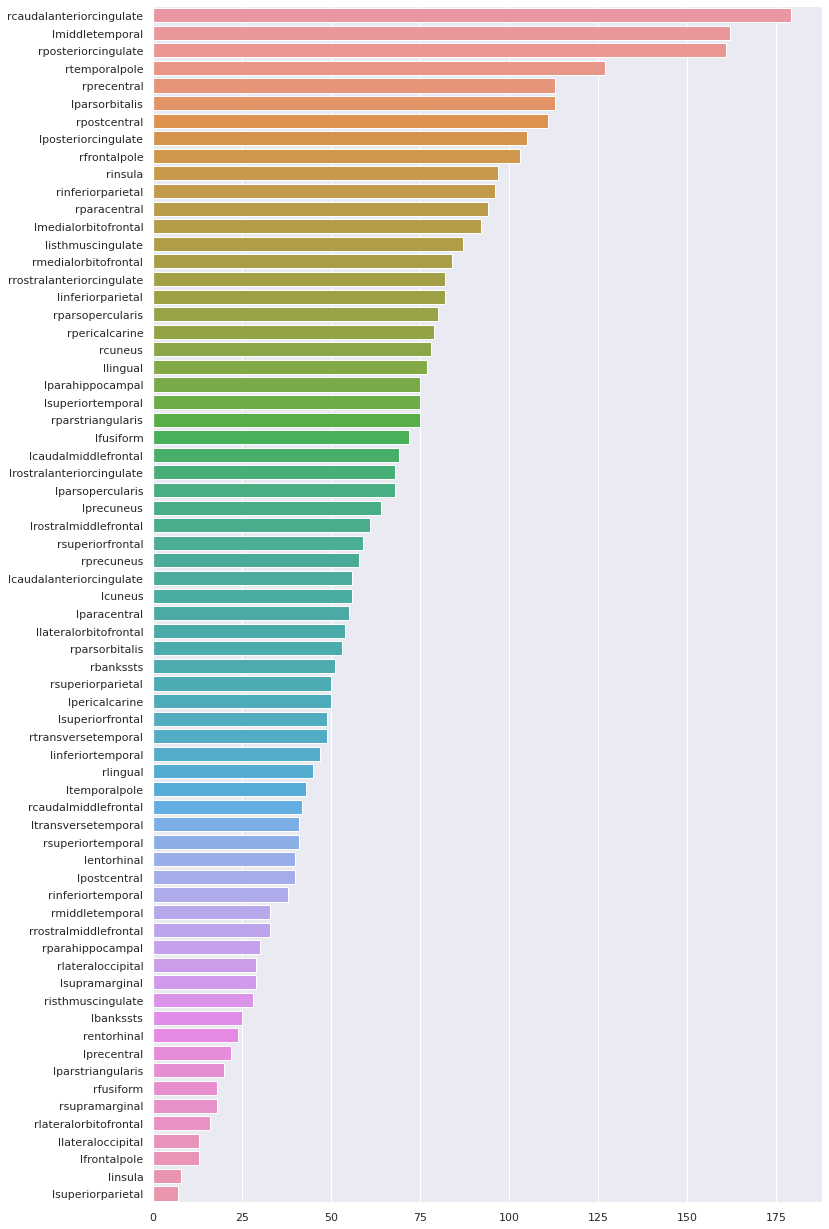

In [69]:
plt.figure(figsize=(12, 22))
sns.barplot(y=bname, x=cnt)

# Analyzing features of best_data_dict 

In [20]:
def feats_analyze(sev_data_dict: dict) -> dict:
    # for behavioral
    breg_cntr = {beh: defaultdict(int) for beh in sev_data_dict.keys()}
    for beh, beh_dict in sev_data_dict.items():
        brain_regions = list(map(lambda x: x.split('_')[1], beh_dict['feats']))
        for b in brain_regions:
            breg_cntr[beh][b] += 1
    return breg_cntr

In [21]:
breg_mild = feats_analyze(best_data_dict['mild_TD'])
breg_mod = feats_analyze(best_data_dict['moderate_TD'])
breg_sever = feats_analyze(best_data_dict['sever_TD'])

In [25]:
len(breg_mild['awa']), len(breg_mild['comm']),len(breg_mild['man']), len(breg_mild['cog']), len(breg_mild['mot']), len(breg_mild['tot'])

(64, 44, 58, 53, 50, 59)

In [26]:
len(breg_mod['awa']), len(breg_mod['comm']),len(breg_mod['man']), len(breg_mod['cog']), len(breg_mod['mot']), len(breg_mod['tot'])

(68, 54, 64, 62, 64, 64)

In [27]:
len(breg_sever['awa']), len(breg_sever['comm']), len(breg_sever['man']), len(breg_sever['cog']), len(breg_sever['mot']), len(breg_sever['tot'])

(62, 65, 63, 68, 63, 66)

# How many times each feature of the best_data_dict[severity][behavior] was nominated in the every experiment?

In [125]:
# neuro-atlas dict
best_data_dict

defaultdict(dict,
            {'mild_TD': {'awa': {'exp': 'experiment_adj59',
               'sev': 'mild_TD',
               'beh': 'awa',
               'rfe': 'lsvm',
               'clc': 'svm',
               'feats': ['area_lbankssts_PERC20',
                'area_lentorhinal_PERC60',
                'area_lentorhinal_PERC80',
                'area_lfusiform_PERC60',
                'area_lfusiform_PERC80',
                'area_linferiortemporal_PERC80',
                'area_listhmuscingulate_PERC40',
                'area_llateralorbitofrontal_PERC20',
                'area_llateralorbitofrontal_PERC60',
                'area_llateralorbitofrontal_PERC80',
                'area_llingual_PERC60',
                'area_llingual_PERC80',
                'area_lparsopercularis_PERC20',
                'area_lparsopercularis_PERC40',
                'area_lparstriangularis_PERC40',
                'area_lparstriangularis_PERC60',
                'area_lparstriangularis_PERC80',
   

In [98]:
# Best behavior cntr for only high classification experiments
feats_sev_beh_counter_clean

NameError: name 'feats_sev_beh_counter_clean' is not defined

In [127]:
# Best behavior cntr for all experiments
feats_sev_beh_counter

defaultdict(dict, {})

### For each behavioral group, aggregate all the features for the best_data_dict (neuro atlases)<br> Excluding _PERC**

In [160]:
neuro_atlas_beh_cntr = {}
for sev in best_data_dict:
    beh_dict = best_data_dict[sev]
    for data_key in beh_dict:
        # 
        data_dict = beh_dict[data_key]
        feats = data_dict['feats']
        rfe = data_dict['rfe']
        clc = data_dict['clc']
#         print(data_dict)
        #
        if data_key not in neuro_atlas_beh_cntr:
            neuro_atlas_beh_cntr[data_key] = {}
            neuro_atlas_beh_cntr[data_key]['rfe'] = {}
            neuro_atlas_beh_cntr[data_key]['clc'] = {}
            neuro_atlas_beh_cntr[data_key]['feats'] = {}
        
        if rfe in neuro_atlas_beh_cntr[data_key]['rfe']:
            neuro_atlas_beh_cntr[data_key]['rfe'][rfe] += 1
        else:
            neuro_atlas_beh_cntr[data_key]['rfe'][rfe] = 1
        
        if clc in neuro_atlas_beh_cntr[data_key]['clc']:
            neuro_atlas_beh_cntr[data_key]['clc'][clc] += 1
        else:
            neuro_atlas_beh_cntr[data_key]['clc'][clc] = 1
        
        
        for feat in feats:
            sfeat = '_'.join(feat.split('_')[:-1])
            if sfeat in neuro_atlas_beh_cntr[data_key]['feats']:
                neuro_atlas_beh_cntr[data_key]['feats'][sfeat] += 1
            else:
                neuro_atlas_beh_cntr[data_key]['feats'][sfeat] = 1             

In [174]:
mot_feats_sorted = sorted(neuro_atlas_beh_cntr['mot']['feats'].items(), key=lambda x:x[1], reverse=True)

In [175]:
cog_feats_sorted = sorted(neuro_atlas_beh_cntr['cog']['feats'].items(), key=lambda x:x[1], reverse=True)

In [176]:
tot_feats_sorted = sorted(neuro_atlas_beh_cntr['tot']['feats'].items(), key=lambda x:x[1], reverse=True)

In [177]:
man_feats_sorted = sorted(neuro_atlas_beh_cntr['man']['feats'].items(), key=lambda x:x[1], reverse=True)

In [178]:
comm_feats_sorted = sorted(neuro_atlas_beh_cntr['comm']['feats'].items(), key=lambda x:x[1], reverse=True)

In [180]:
def brain_reg_cntr_from_sorted_list(feats_sorted, cntr='brain'):
    if 'brai' in cntr:
        idx = 1
    elif 'mor' in cntr:
        idx = 0
    cntr_dict = defaultdict(int)
    for feat, score in feats_sorted:
        ffeat = feat.split('_')[idx]
        cntr_dict[ffeat] += score
    return cntr_dict

In [184]:
mot_cntr_dict = brain_reg_cntr_from_sorted_list(mot_feats_sorted, 'morph')
mot_cntr_dict

defaultdict(int, {'area': 138, 'curv': 151, 'volume': 93, 'thickness': 97})

### For each behavioral group, aggregate all features of the best (clean) experimental results

In [191]:
selected_feats_beh_cntr = {}
for sev in feats_sev_beh_counter_clean:
    beh_dict = feats_sev_beh_counter_clean[sev]
    for data_key in beh_dict:
        # 
        data_dict = beh_dict[data_key]

        if data_key not in selected_feats_beh_cntr:
            selected_feats_beh_cntr[data_key] = {}
             
        for feat, cnt in data_dict.items():
            sfeat = '_'.join(feat.split('_')[:-1])
            if sfeat in selected_feats_beh_cntr[data_key]:
                selected_feats_beh_cntr[data_key][sfeat] += cnt
            else:
                selected_feats_beh_cntr[data_key][sfeat] = cnt      

In [200]:
most_selected_mot_feats = sorted(selected_feats_beh_cntr['mot'].items(), key=lambda x: x[1], reverse=True)

In [201]:
most_selected_man_feats = sorted(selected_feats_beh_cntr['man'].items(), key=lambda x: x[1], reverse=True)

In [202]:
most_selected_cog_feats = sorted(selected_feats_beh_cntr['cog'].items(), key=lambda x: x[1], reverse=True)

In [203]:
most_selected_tot_feats = sorted(selected_feats_beh_cntr['tot'].items(), key=lambda x: x[1], reverse=True)

In [204]:
most_selected_comm_feats = sorted(selected_feats_beh_cntr['comm'].items(), key=lambda x: x[1], reverse=True)

In [205]:
most_selected_awa_feats = sorted(selected_feats_beh_cntr['awa'].items(), key=lambda x: x[1], reverse=True)

In [243]:
morph_sorted = brain_reg_cntr_from_sorted_list(most_selected_mot_feats, 'brain')

In [244]:
morph_sorted_list = sorted(morph_sorted.items(), key=lambda x: x[1], reverse=True)

<AxesSubplot:>

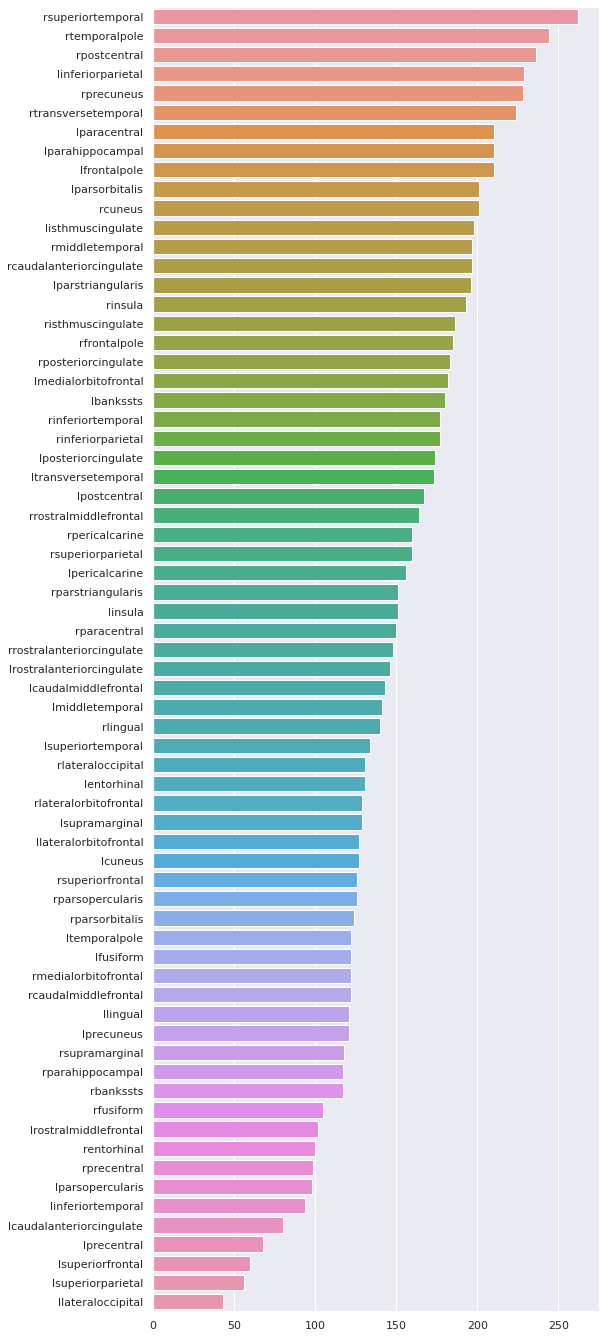

In [245]:
plt.figure(figsize=(8, 24))
# bnames = list(map(lambda x: x[0], morph_sorted.items()))
# cntr = list(map(lambda x: x[1], morph_sorted.items()))

# bnames = list(map(lambda x: x[0], mot_feats_sorted))
# cntr = list(map(lambda x: x[1], mot_feats_sorted))

bnames = list(map(lambda x: x[0], morph_sorted_list))
cntr = list(map(lambda x: x[1], morph_sorted_list))


sns.barplot(y=bnames, x=cntr)

<AxesSubplot:>

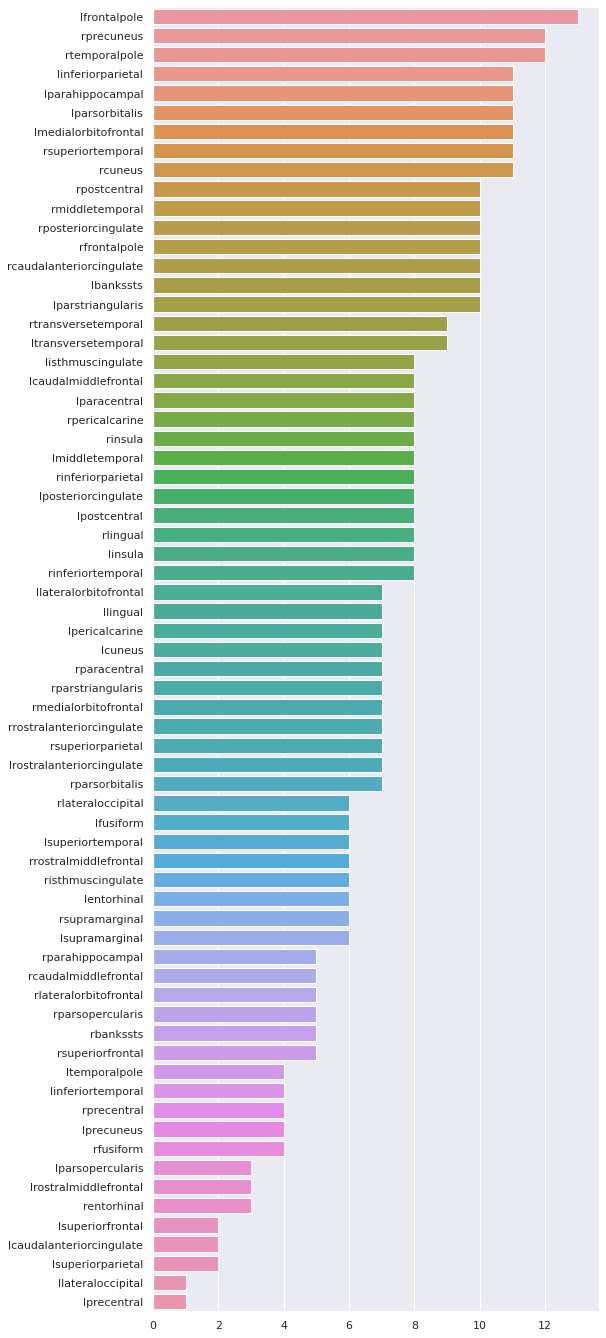

In [246]:
morph_sorted = brain_reg_cntr_from_sorted_list(mot_feats_sorted, 'brain')
morph_sorted_list = sorted(morph_sorted.items(), key=lambda x: x[1], reverse=True)
plt.figure(figsize=(8, 24))
bnames = list(map(lambda x: x[0], morph_sorted_list))
cntr = list(map(lambda x: x[1], morph_sorted_list))


sns.barplot(y=bnames, x=cntr)